In [41]:
# Importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# uploading the data and removing null values
billionaire = pd.read_csv(r"I:\Forbes 2024 Billionaire List.csv",\
                          usecols = ["Name","Age","2024 Net Worth","Industry", "Source of Wealth","Organization","Self-Made","Citizenship","Gender"],\
                          index_col = "Name")
billionaire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2781 entries, Bernard Arnault & family to Zhu Yiwen & family
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2698 non-null   float64
 1   2024 Net Worth    2781 non-null   object 
 2   Industry          2781 non-null   object 
 3   Source of Wealth  2781 non-null   object 
 4   Organization      907 non-null    object 
 5   Self-Made         2781 non-null   bool   
 6   Citizenship       2781 non-null   object 
 7   Gender            2781 non-null   object 
dtypes: bool(1), float64(1), object(6)
memory usage: 176.5+ KB


In [45]:
# Adding Rank column
n = int(0)
for  r in billionaire.index:
    n +=1
    billionaire.loc[r, "Rank"] = n
billionaire["Rank"] = billionaire["Rank"].astype("int")

# Cleaning data
billionaire["Industry"].astype("category")
billionaire = billionaire.dropna()
billionaire["2024 Net Worth"] = billionaire["2024 Net Worth"].str.strip("$")
billionaire["2024 Net Worth"] = billionaire["2024 Net Worth"].str.strip("B")

<Axes: title={'center': 'Top 6 industry that have billionaire '}, ylabel='Total_Count'>

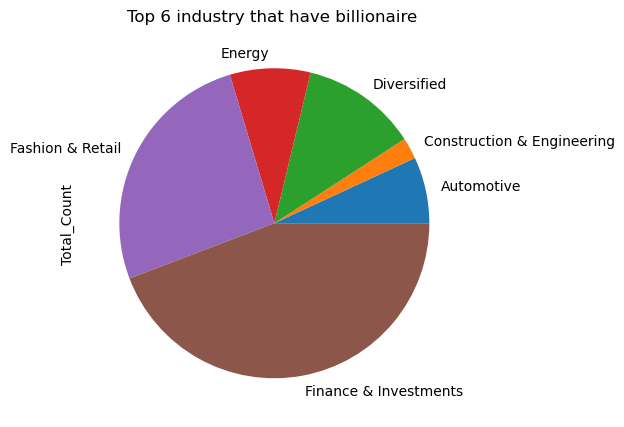

In [47]:
# top 5 industries that has more billionaires
df = billionaire["Industry"]
df = df.to_frame()
df_pie = df.groupby(df["Industry"]).size().reset_index(name = "Total_Count").head(6)
df_pie = df_pie.set_index("Industry")
df_pie.plot(kind = "pie", x = "Industry", y = "Total_Count", figsize = (5,10), legend =False, title = "Top 6 industry that have billionaire ")

<Axes: title={'center': 'Top Five Billionaire'}, xlabel='In Billions($)', ylabel='Name'>

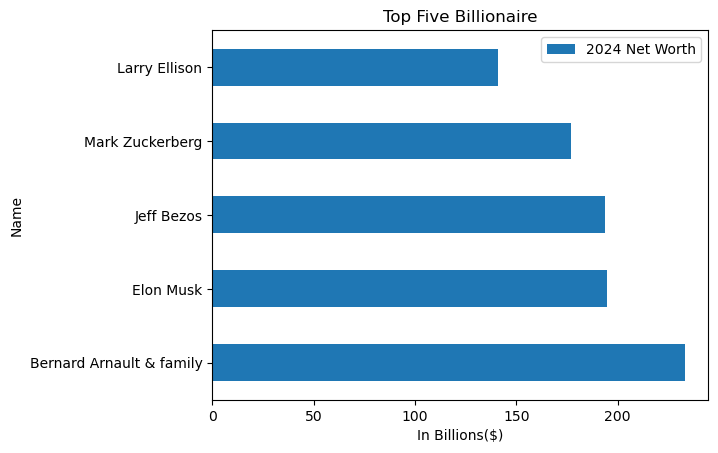

In [49]:
# Top five Billionaires
top_billionaire = billionaire.head()
top_billionaire = top_billionaire["2024 Net Worth"].astype(int).to_frame()
top_billionaire.plot(kind= "barh", y = "2024 Net Worth", title = "Top Five Billionaire", xlabel = "In Billions($)")

<Axes: title={'center': 'Top 5 Countries that have billionaire '}, xlabel='Countries', ylabel='In Billions ($)'>

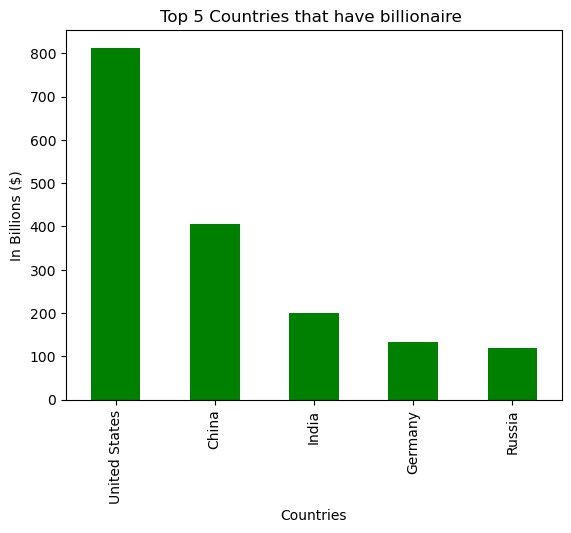

In [51]:
# Top 5 Countries tha have billionaire
billionaire = pd.read_csv(r"I:\Forbes 2024 Billionaire List.csv")
country_billionaire = billionaire["Citizenship"]
country_billionaire = country_billionaire.to_frame()
cb_pie = country_billionaire.groupby(country_billionaire["Citizenship"]).size().reset_index(name = "Total_Count")
cb_pie = cb_pie.set_index("Citizenship").sort_values("Total_Count", ascending = False).head(5)
cb_pie.plot(kind = "bar", y = "Total_Count", title = "Top 5 Countries that have billionaire ",color = ("green"),\
           xlabel = "Countries", ylabel = "In Billions ($)", legend = False)

<Axes: title={'center': 'Top 5 Education that made billionaires '}, xlabel='Education', ylabel='No.of.Billionaires'>

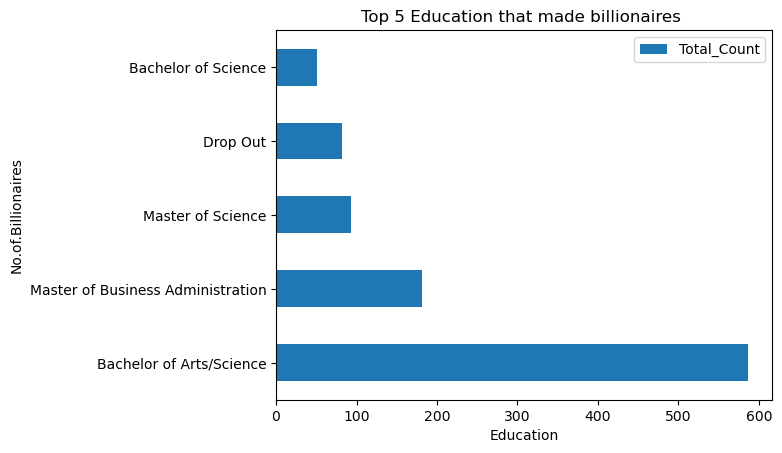

In [53]:
# Top 5 Education that made billionaires
billionaire = pd.read_csv(r"I:\Forbes 2024 Billionaire List.csv")
billionaire["Education"].unique()
education = billionaire["Education"].str.strip().str.split(",", expand = True)
education = education[0].to_frame().dropna()
education = education.rename(columns = {0:"Education"})
edu_group = education.groupby("Education").size().reset_index(name = "Total_Count").sort_values("Total_Count", ascending = False).head(5)
edu_group.plot(kind = "barh",x = "Education", y = "Total_Count", title = "Top 5 Education that made billionaires ",\
           xlabel = "Education", ylabel = "No.of.Billionaires", legend = True)